In [2]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
env = gym.make('FrozenLake-v0')

In [4]:
tf.reset_default_graph()

In [5]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16], dtype=tf.float32)
weights = tf.Variable(tf.random_uniform([16,4], 0, 0.01))
q_output = tf.matmul(inputs1, weights)
predict = tf.argmax(q_output, 1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
next_q = tf.placeholder(shape=[1,4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(next_q - q_output))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updated_model = trainer.minimize(loss)

In [13]:
init = tf.initialize_all_variables()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
# create lists to contain total rewards and steps per episode
max_step_list = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        all_rewards = 0
        reached_destination = False
        step = 0
        #The Q-Network
        while step < 99:
            step += 1
            # Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,q_output], feed_dict={inputs1:np.identity(16)[s:s+1]})
            # add noise
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            # Get new state and reward from environment
            s1,r,reached_destination,_ = env.step(a[0])
            # right now, we do not have any table, so we need to get the Q value with s1 by feeding
            # s1 to the neuron network
            Q1 = sess.run(q_output,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            # Obtain maxQ' and set our target value for chosen action. 
            # We still get the target q value with bellman equition
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y * maxQ1
            # Train our network using target and predicted Q values
            _,W1 = sess.run([updated_model,weights], feed_dict={inputs1:np.identity(16)[s:s+1], next_q:targetQ})
            all_rewards += r
            s = s1
            if reached_destination:
                # Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        max_step_list.append(step)
        rList.append(all_rewards)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

Percent of succesful episodes: 0.49%


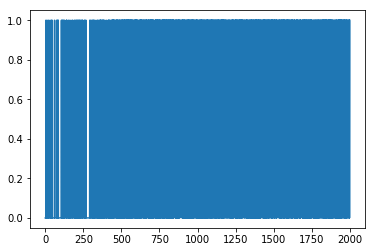

In [14]:
plt.plot(rList)

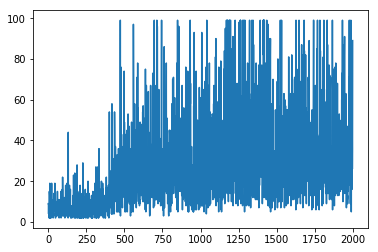

In [15]:
plt.plot(jList)